<a href="https://colab.research.google.com/github/sams917/Tooth_Detection/blob/master/tooth_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Aug 28 15:48:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!unzip /content/ToothNumber_TaskDataset.zip -d /content/ToothNumber_TaskDataset

Archive:  /content/ToothNumber_TaskDataset.zip
   creating: /content/ToothNumber_TaskDataset/images/
   creating: /content/ToothNumber_TaskDataset/labels/
  inflating: /content/ToothNumber_TaskDataset/images/cate8-00059_jpg.rf.d0bd3cb39cc429692abe9c8cf6f9c75e.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/b879ef2c-20250503-101257822.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/cate1-00008_jpg.rf.10436fa8d35c0764df5402f3a6f093dc.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/1c50bda9-20241231-145320490.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/cate8-00131_jpg.rf.9755ad7a2010d677500a57fe7291285f.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/b9b8b22f-20240730-123647335.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/cate2-00127_jpg.rf.aaba4e5e69cf5a828885a05115aa8d11.jpg  
  inflating: /content/ToothNumber_TaskDataset/images/cate8-00191_jpg.rf.856a6afd259fc24434201fdf1c9b37a0.jpg  
  inflating: /content/ToothNu

In [3]:
import os
import random
import shutil
import yaml

In [4]:
import os, shutil, random

images_dir = "/content/ToothNumber_TaskDataset/images"
labels_dir = "/content/ToothNumber_TaskDataset/labels"

for split in ["train", "val", "test"]:
    os.makedirs(f"/content/ToothNumber_TaskDataset/images/{split}", exist_ok=True)
    os.makedirs(f"/content/ToothNumber_TaskDataset/labels/{split}", exist_ok=True)

all_images = [f for f in os.listdir(images_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
random.shuffle(all_images)

train_split = int(0.8 * len(all_images))
val_split   = int(0.9 * len(all_images))  # 80% train, 10% val, 10% test

train_images = all_images[:train_split]
val_images   = all_images[train_split:val_split]
test_images  = all_images[val_split:]

def move_files(image_list, split):
    for img in image_list:
        label = img.rsplit(".", 1)[0] + ".txt"
        shutil.move(os.path.join(images_dir, img), f"/content/ToothNumber_TaskDataset/images/{split}/{img}")
        shutil.move(os.path.join(labels_dir, label), f"/content/ToothNumber_TaskDataset/labels/{split}/{label}")

move_files(train_images, "train")
move_files(val_images, "val")
move_files(test_images, "test")


In [5]:
import yaml

data_yaml = {
    "train": "/content/ToothNumber_TaskDataset/images/train",
    "val": "/content/ToothNumber_TaskDataset/images/val",
    "test": "/content/ToothNumber_TaskDataset/images/val",
    "nc": 32,
    "names": [
        '13','23','33','43','21','41','31','11',
        '16','26','36','46','14','34','44','24',
        '22','32','42','12','17','27','37','47',
        '15','25','35','45','18','28','38','48'
    ]
}

with open("/content/ToothNumber_TaskDataset/data.yaml", "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print("✅ Dataset split and data.yaml created with train/val/test!")



✅ Dataset split and data.yaml created with train/val/test!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.0 MB/s eta 0:00:00


In [7]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.1/112.6 GB disk)


In [8]:
from ultralytics import YOLO
from IPython.display import Image

In [9]:
!yolo task=detect mode=train data=/content/ToothNumber_TaskDataset/data.yaml model="yolo11m.pt" epochs=150 imgsz=640

Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ToothNumber_TaskDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

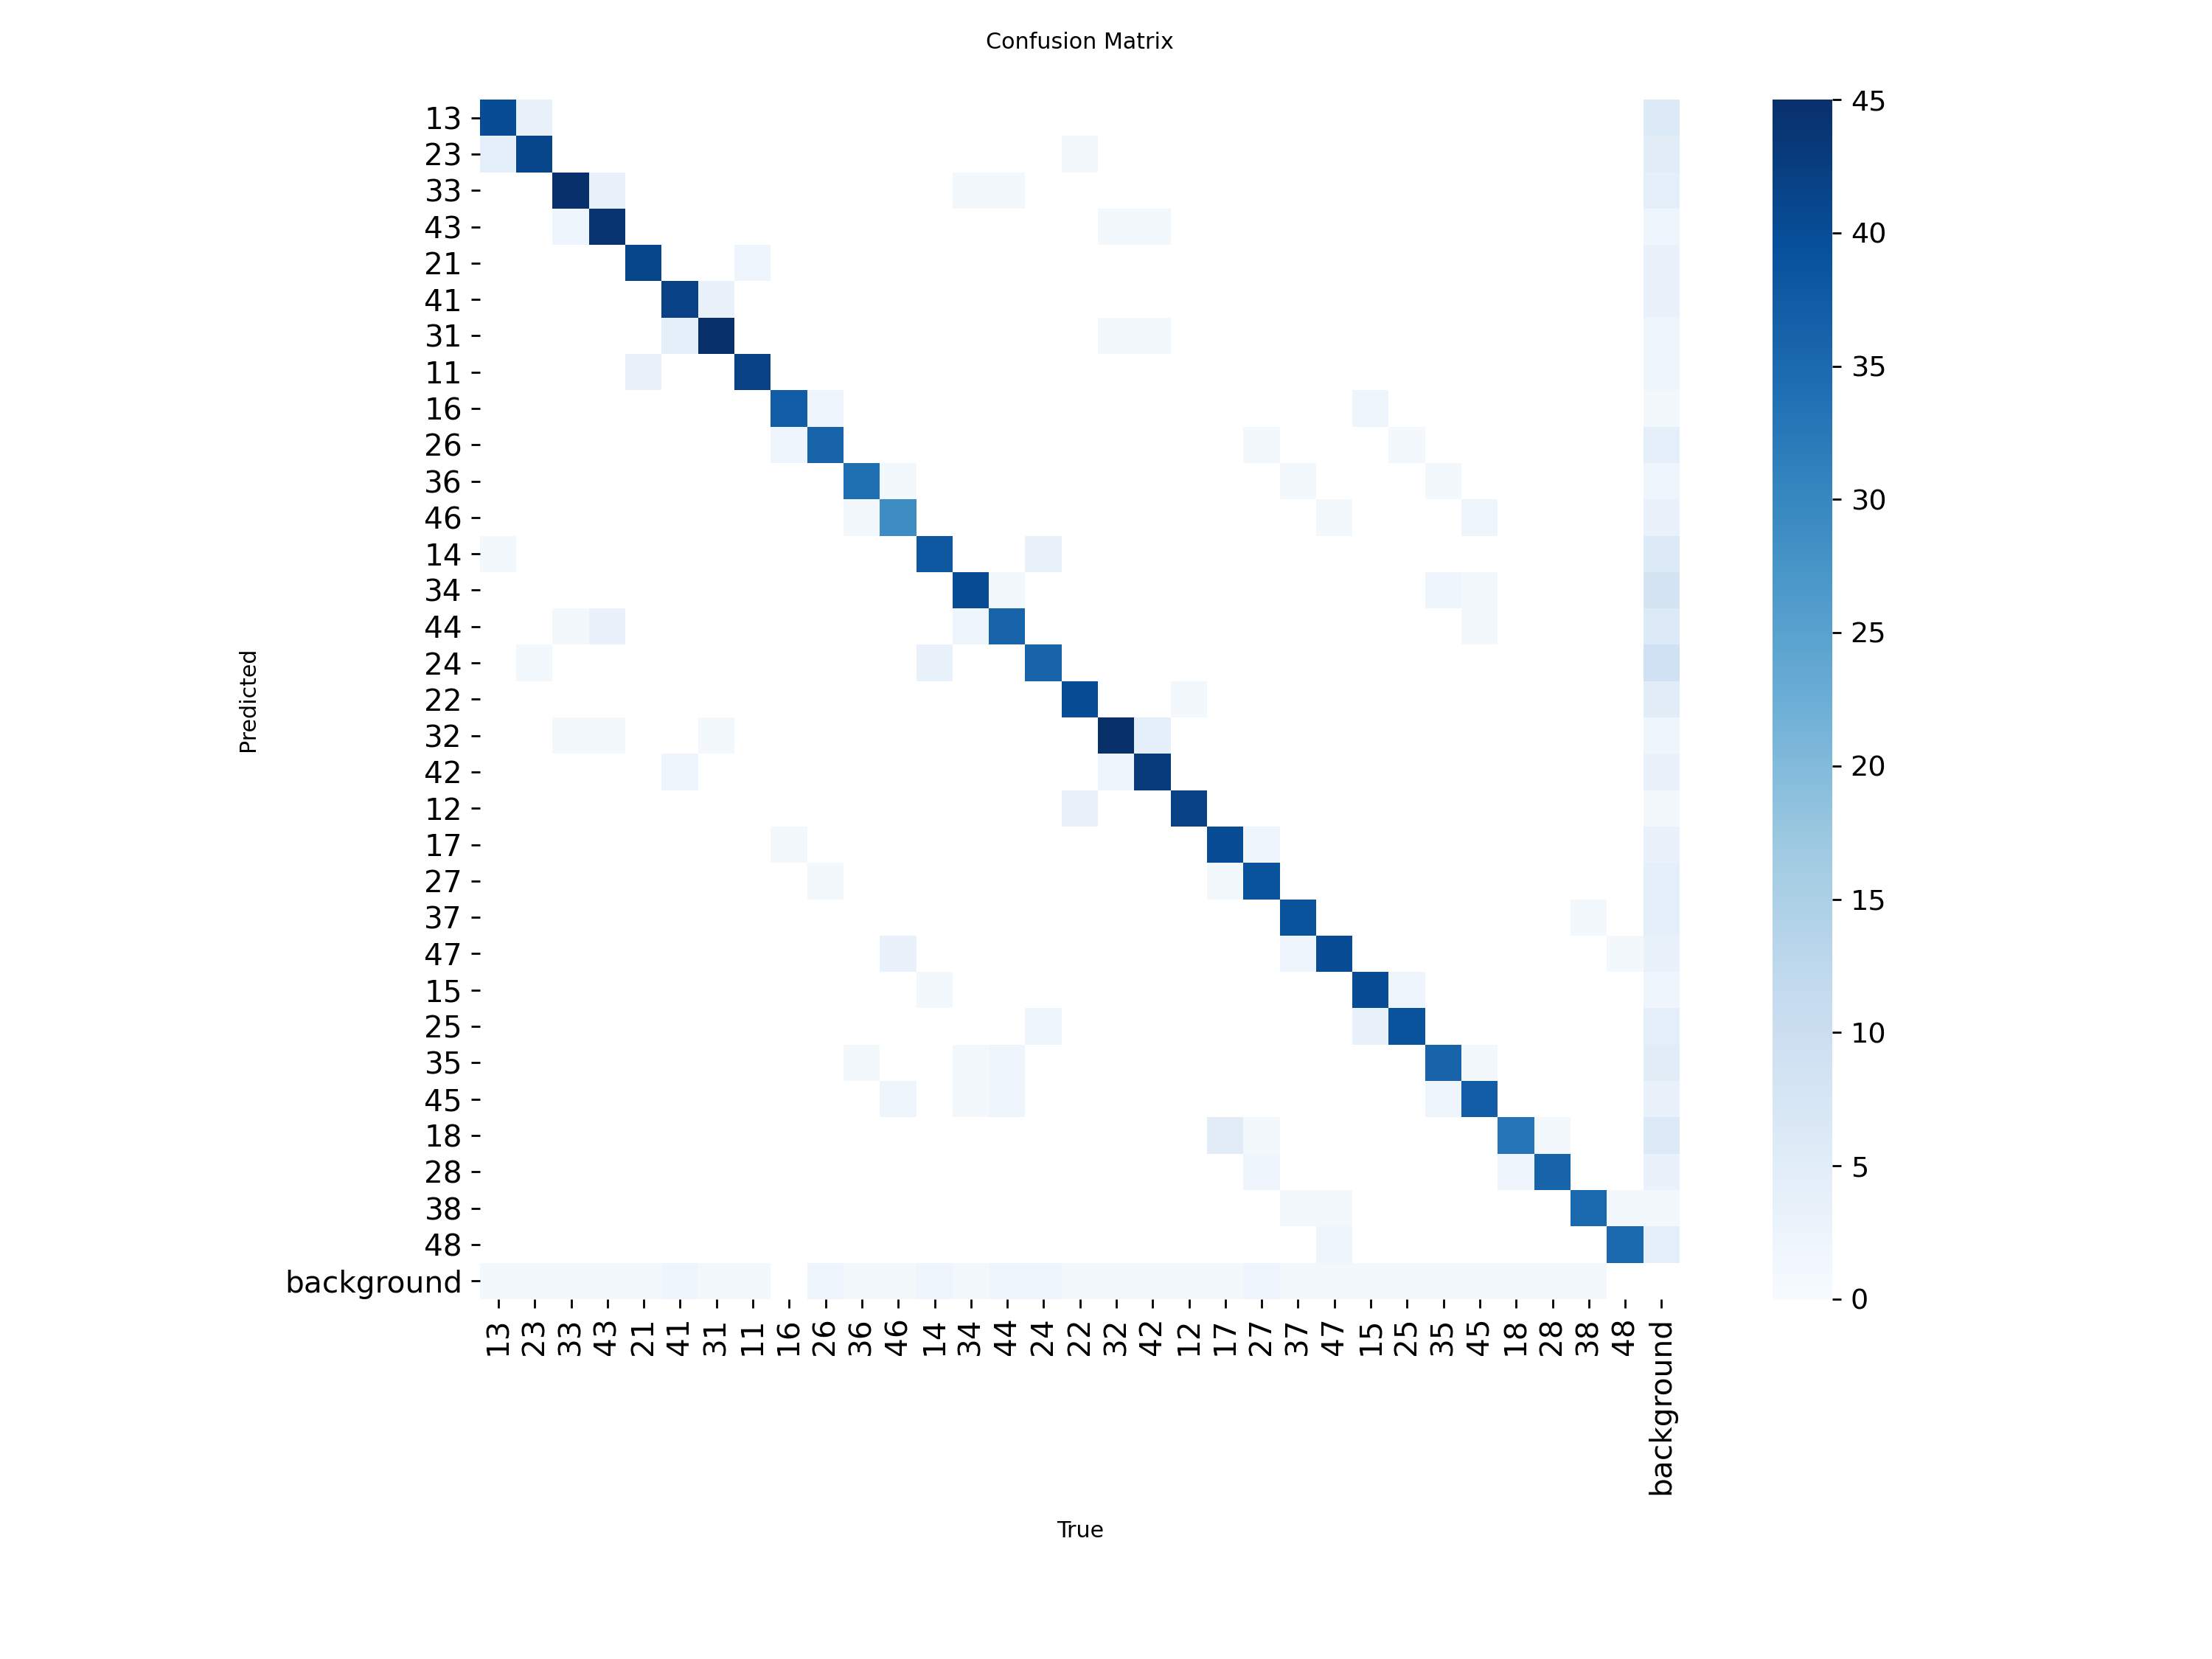

In [20]:
Image("/content/runs/detect/train/confusion_matrix.png" , width=1000)

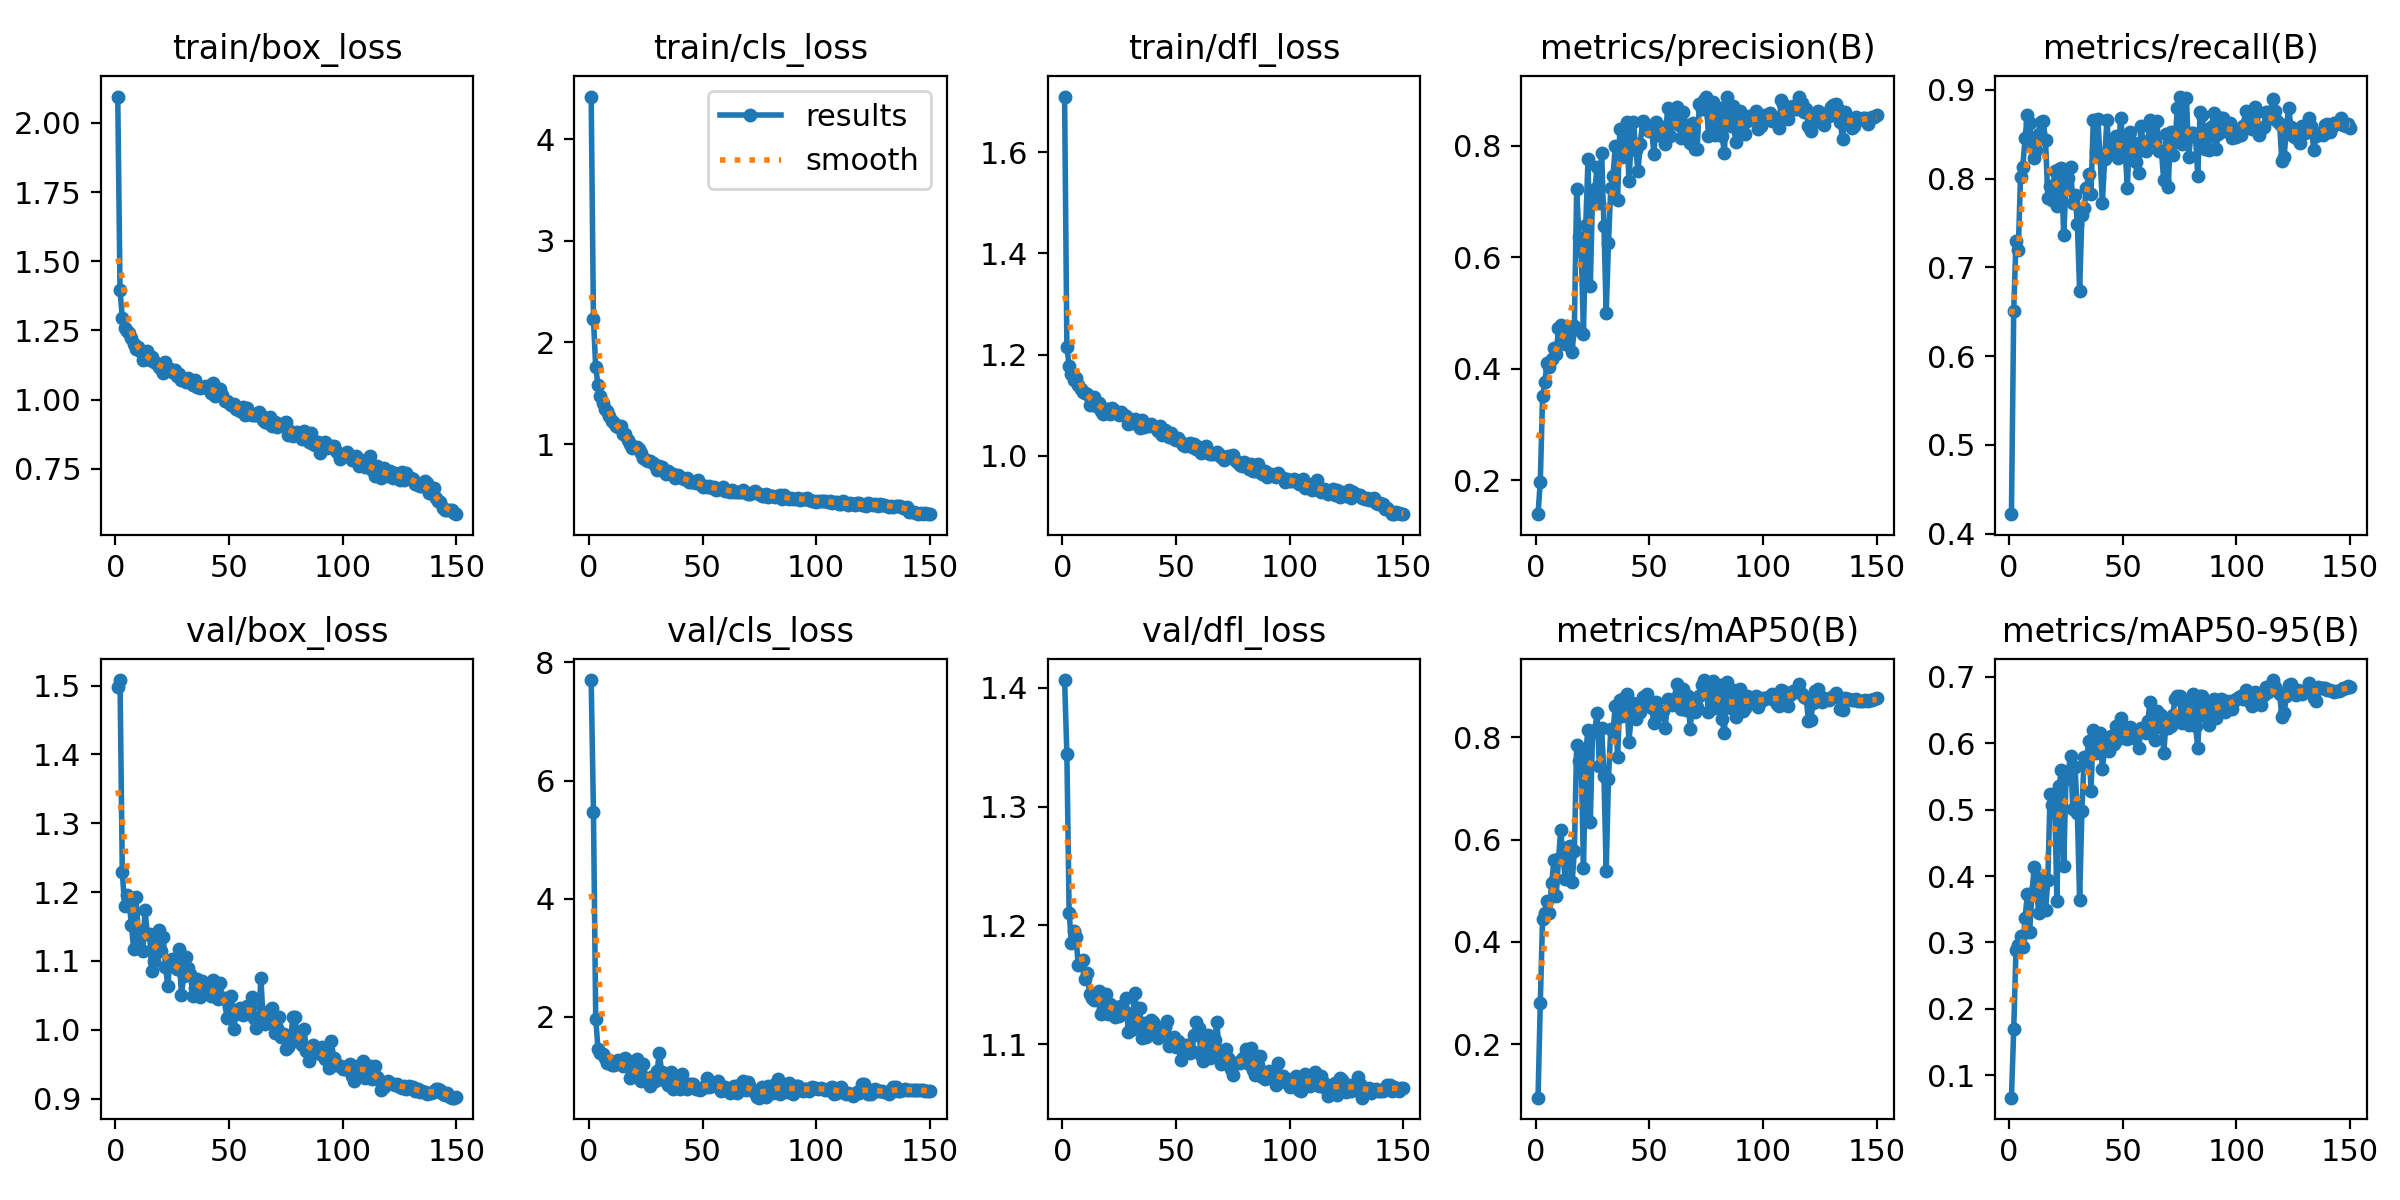

In [21]:
Image("/content/runs/detect/train/results.png" , width=1000)

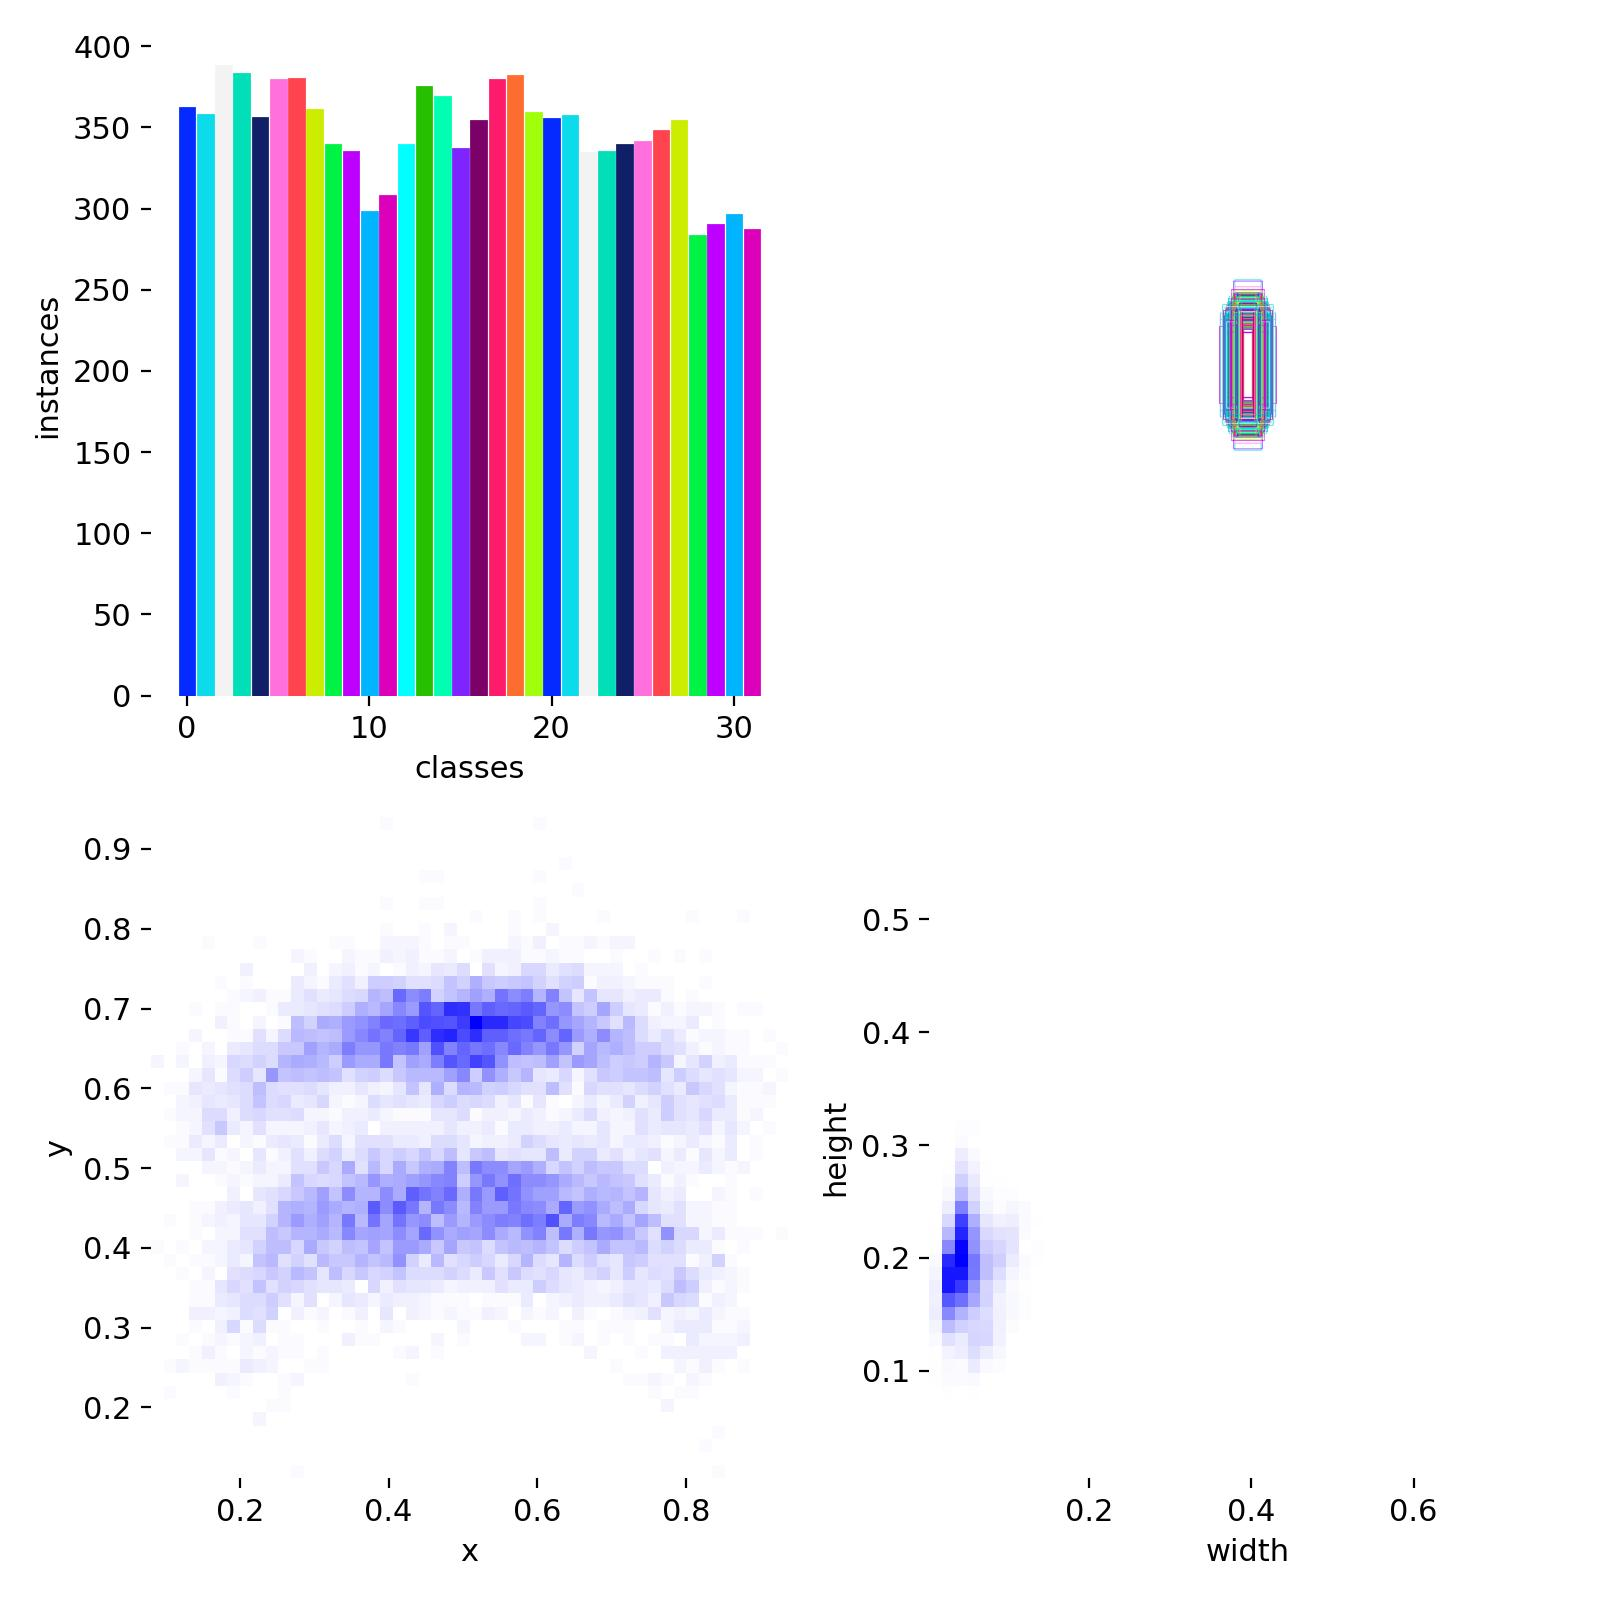

In [22]:
Image("/content/runs/detect/train/labels.jpg",width=1000)

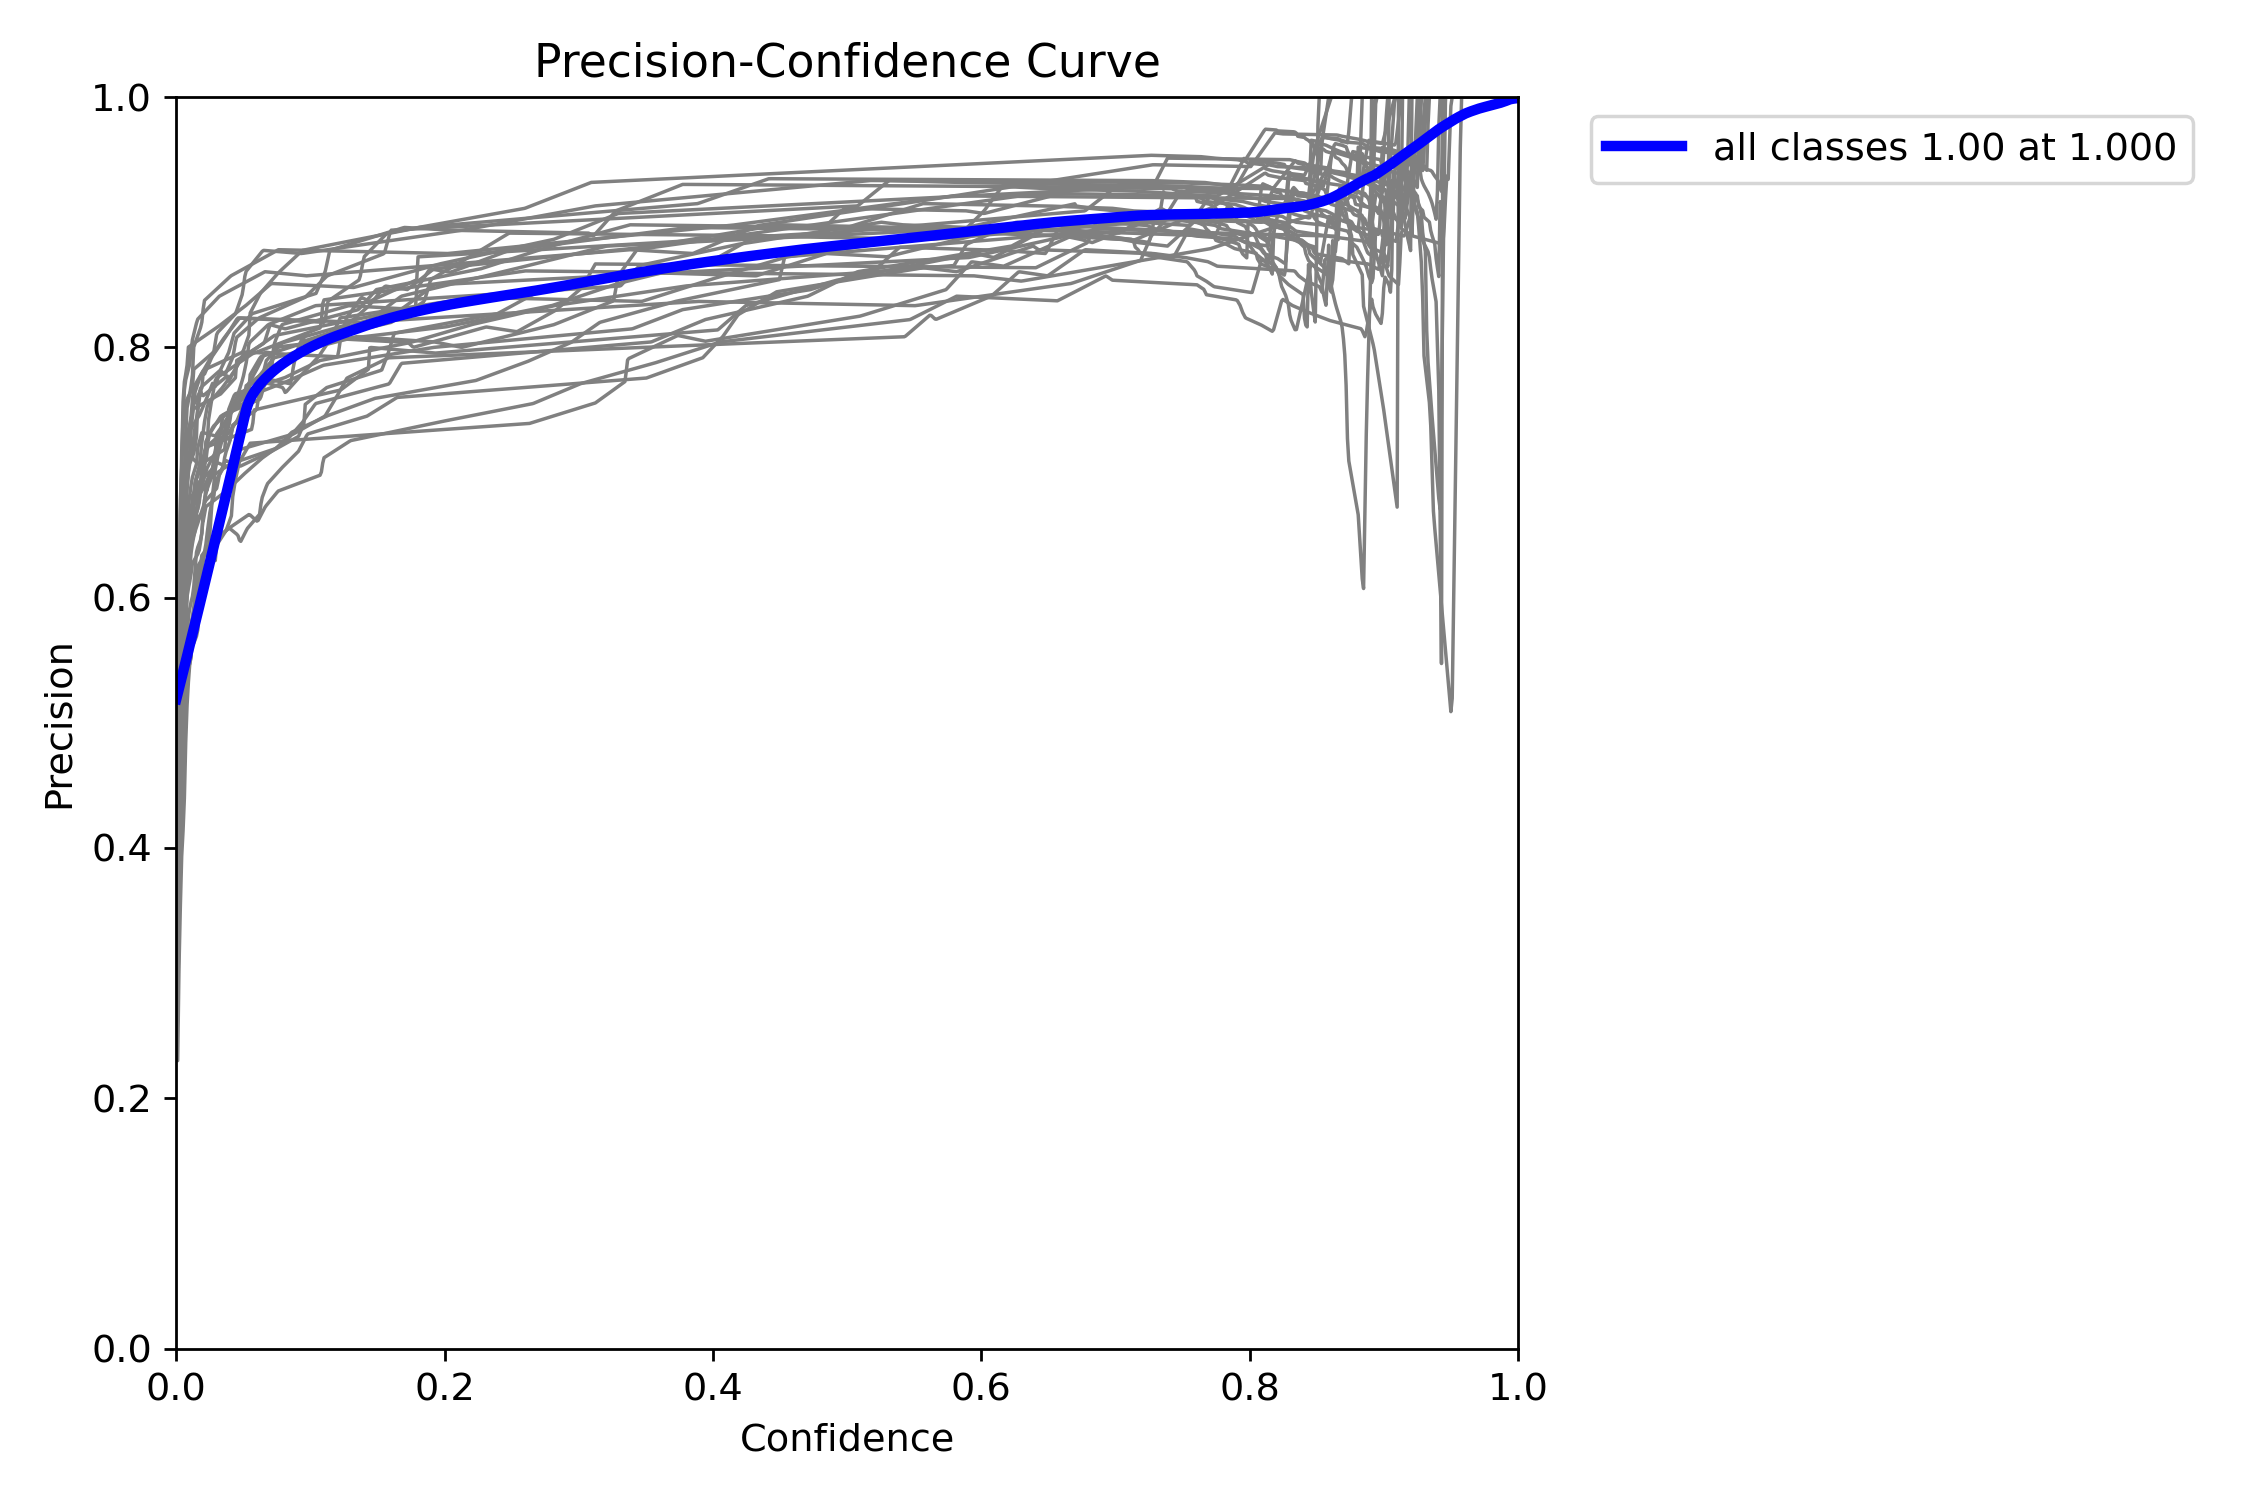

In [23]:
Image("/content/runs/detect/train/BoxP_curve.png" , width=1000)

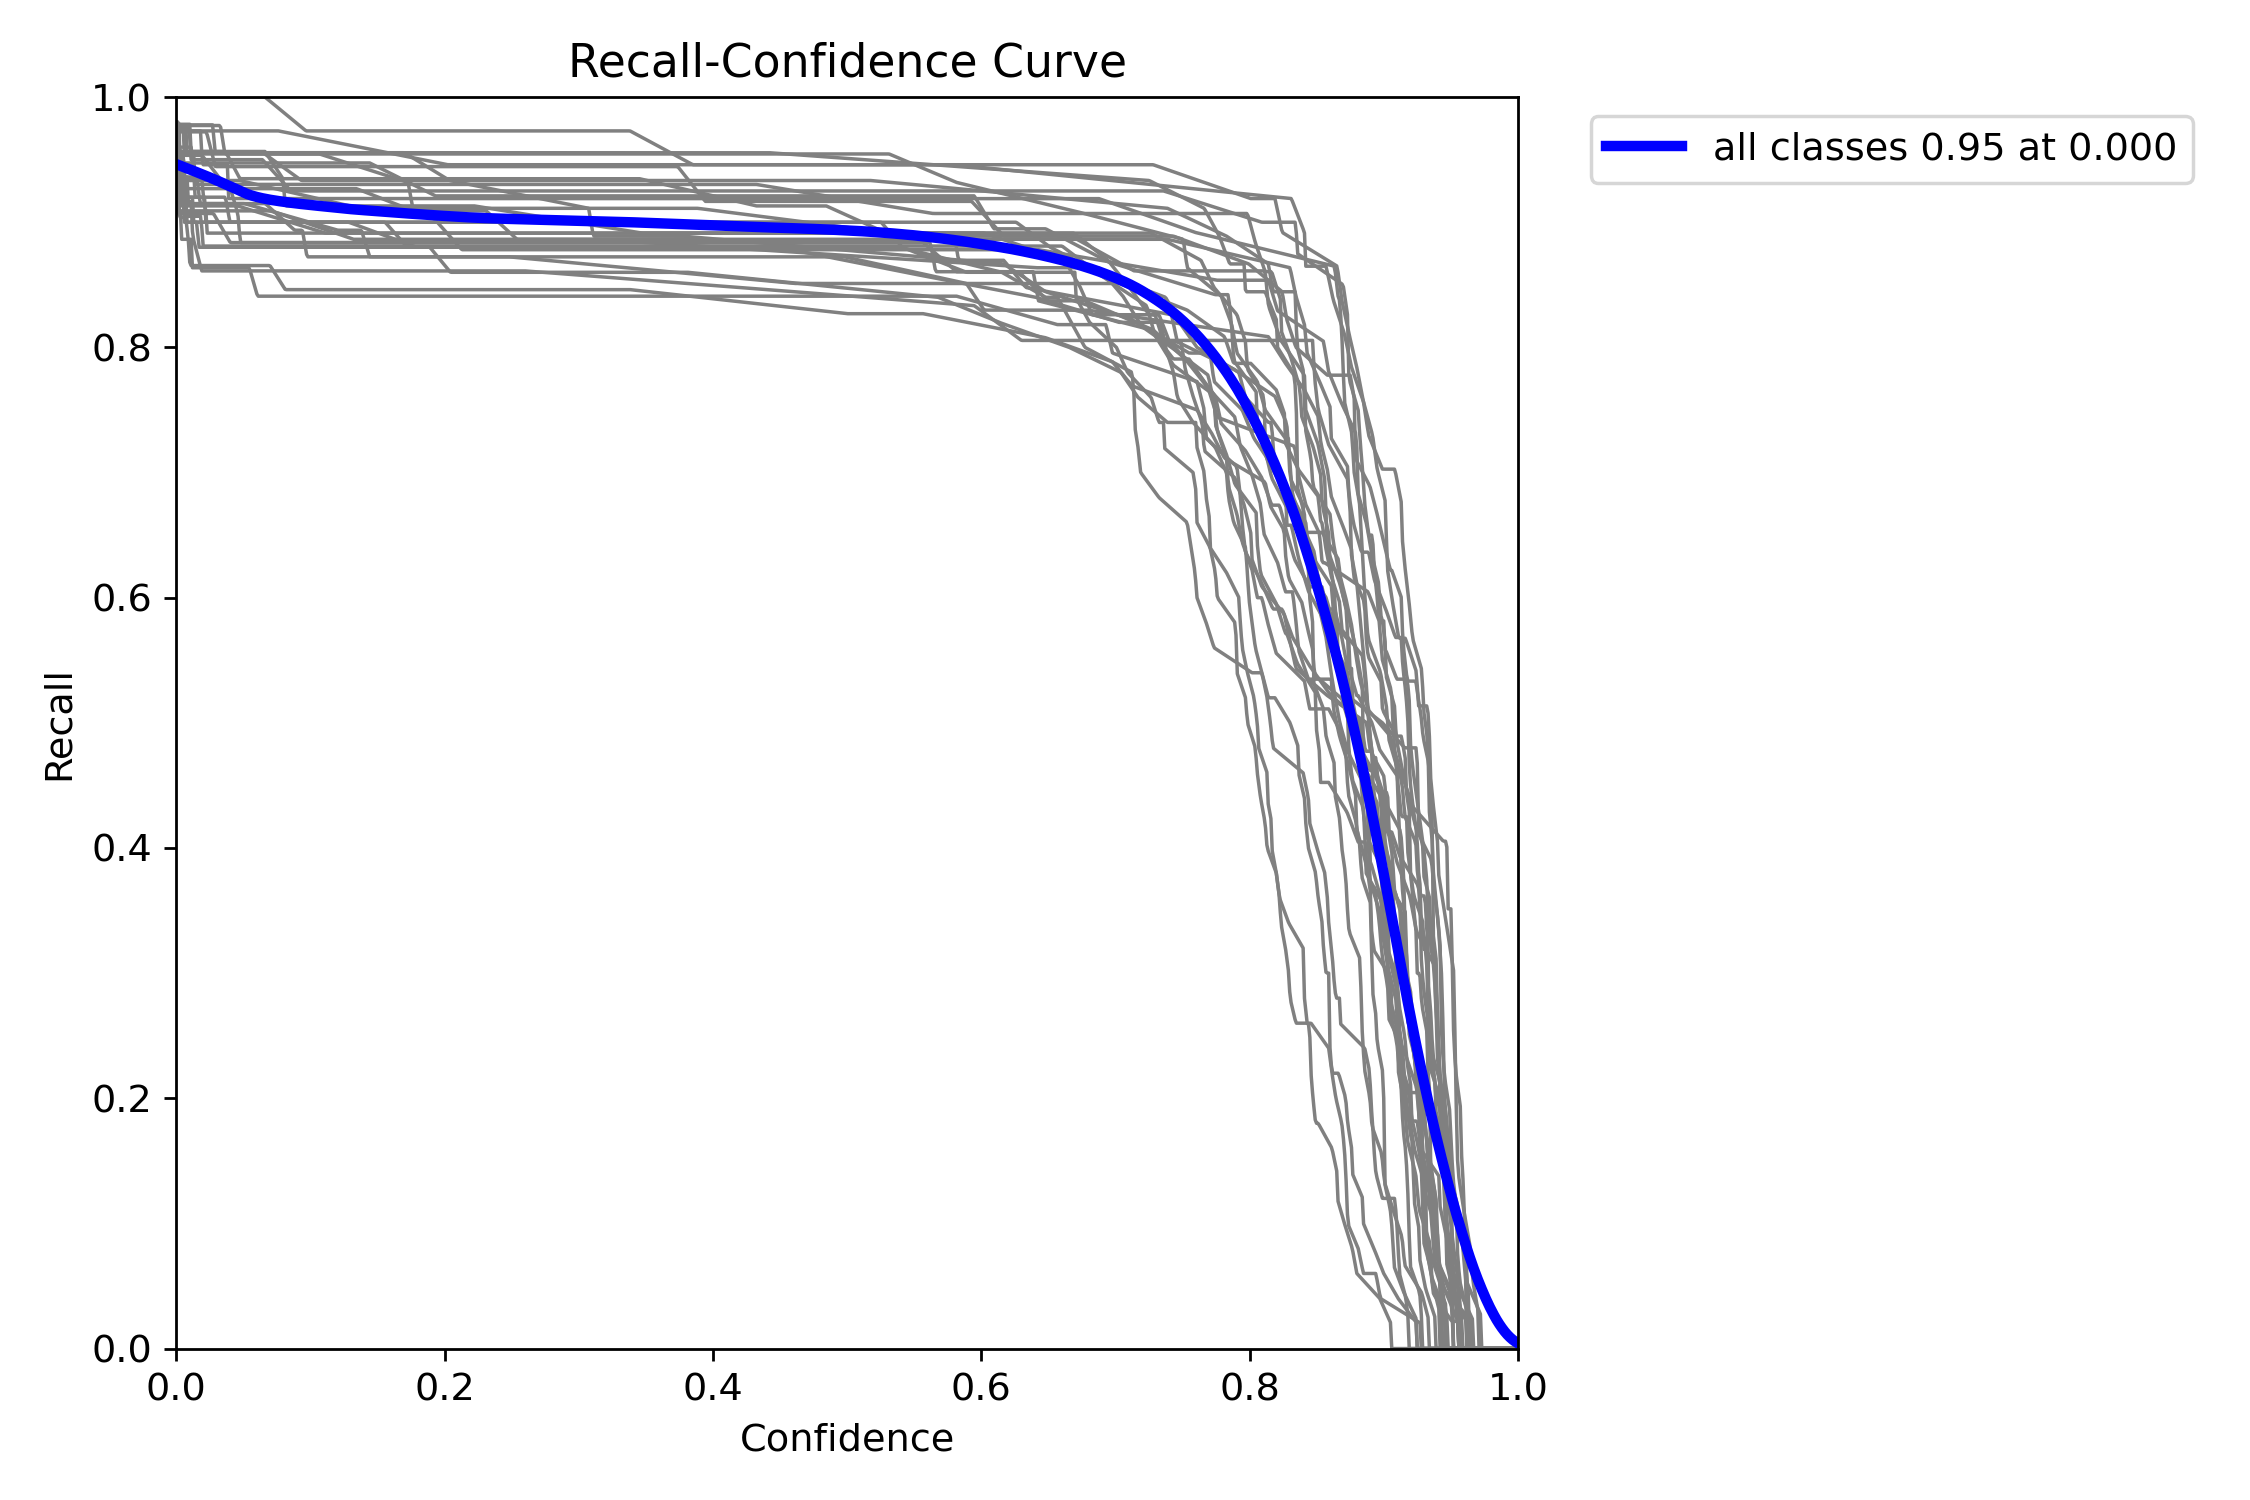

In [24]:
Image("/content/runs/detect/train/BoxR_curve.png" , width=1000)

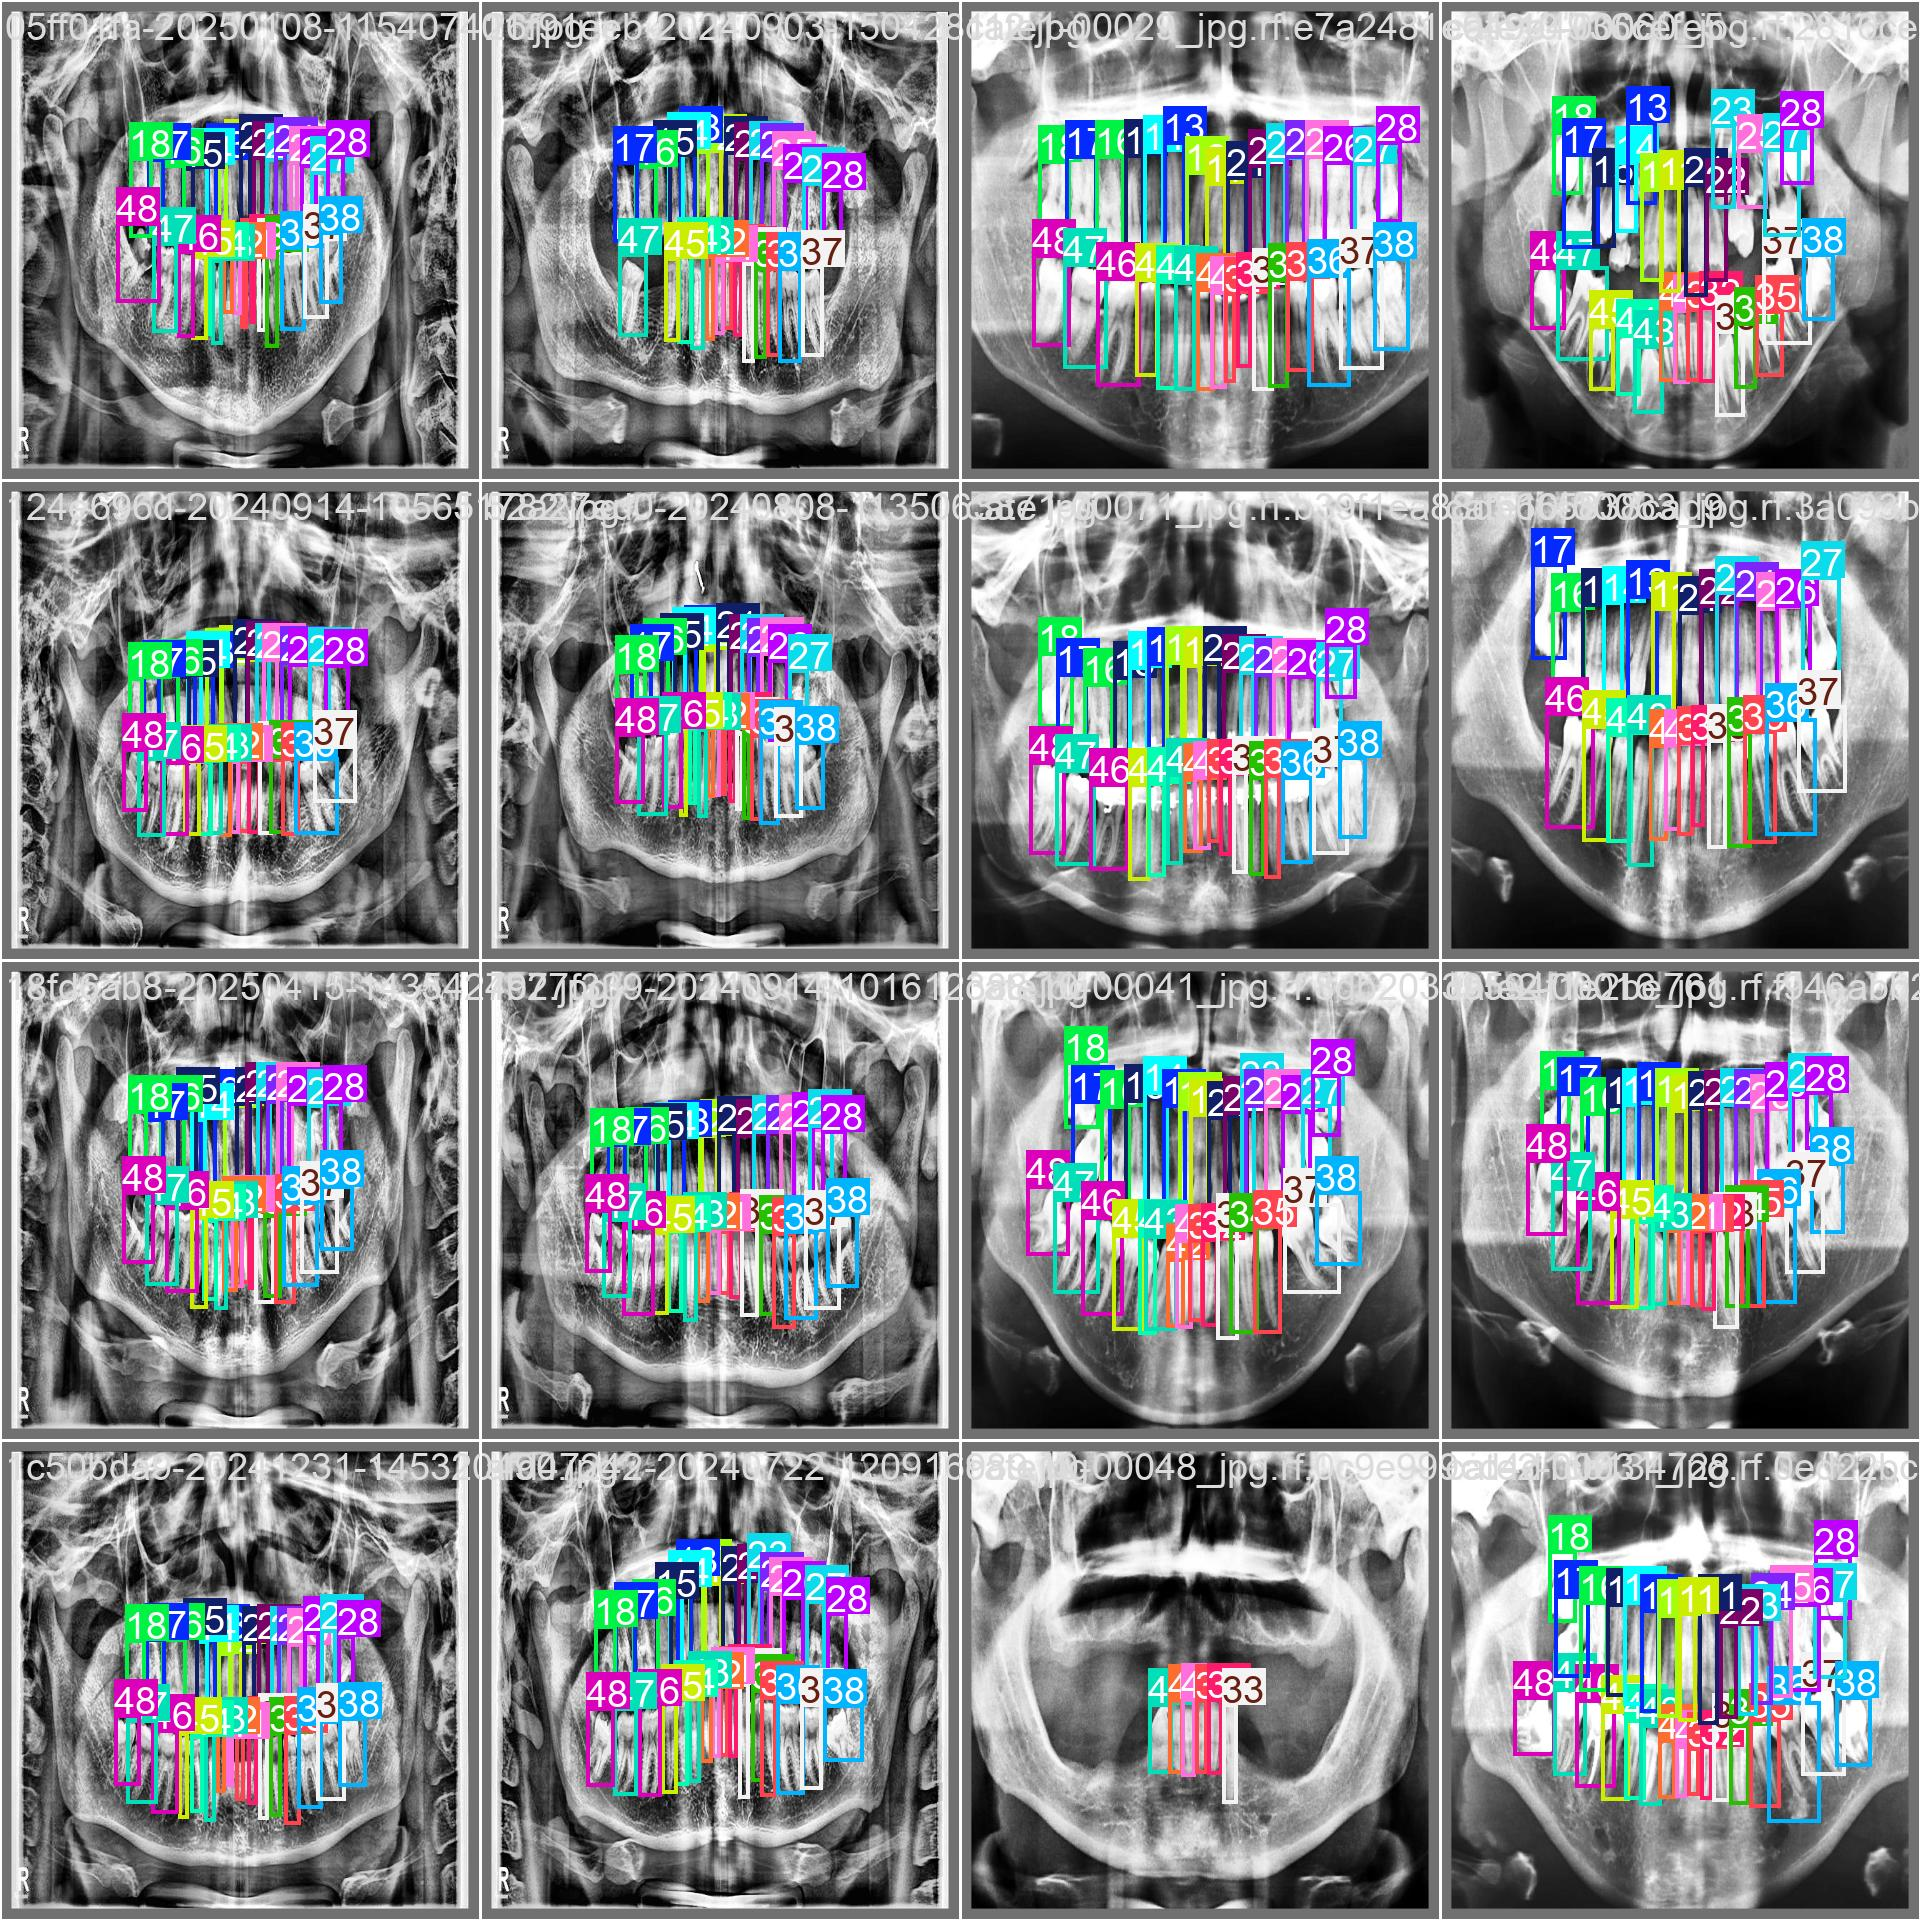

In [14]:
Image("/content/runs/detect/train/val_batch0_labels.jpg" , width=1000)

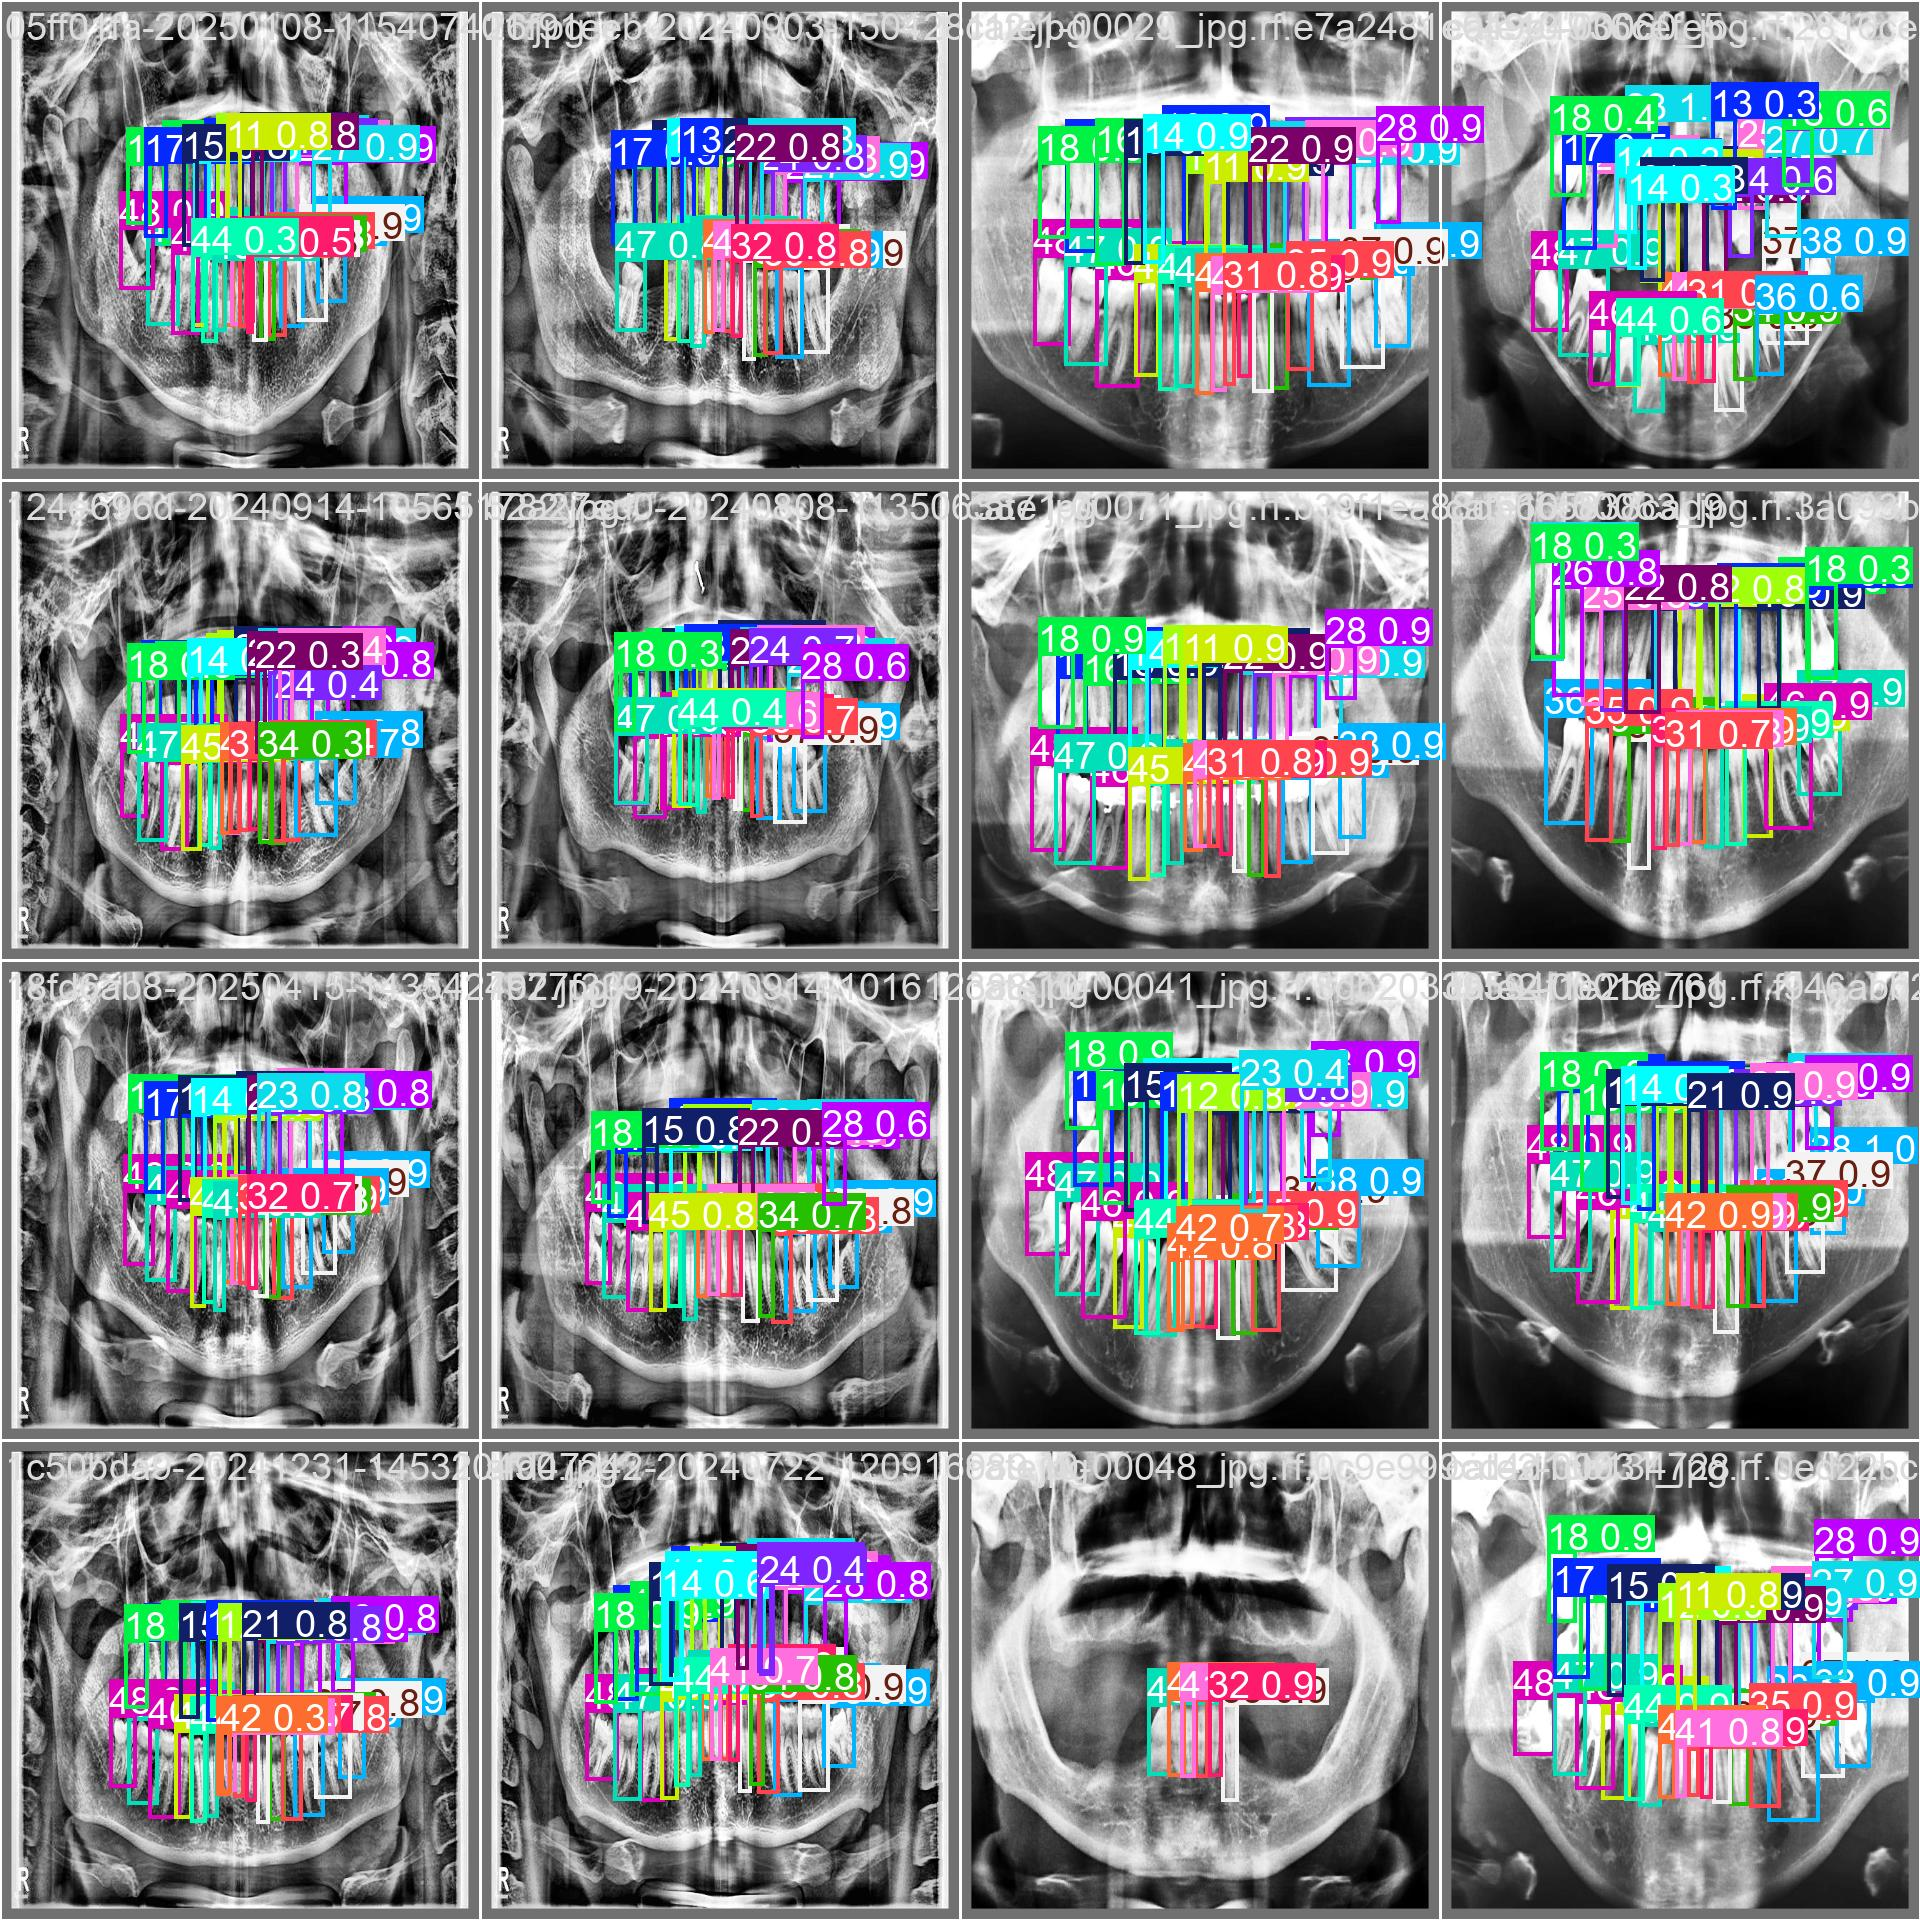

In [15]:
Image("/content/runs/detect/train/val_batch0_pred.jpg" , width=1000)

In [16]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/ToothNumber_TaskDataset/images/test" save=True

Ultralytics 8.3.188 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,054,704 parameters, 0 gradients, 67.8 GFLOPs

image 1/50 /content/ToothNumber_TaskDataset/images/test/0fd502a1-20250123-111857443.jpg: 640x640 1 13, 2 23s, 1 33, 1 43, 1 21, 1 41, 1 31, 1 11, 1 16, 1 26, 1 36, 1 46, 1 14, 1 34, 1 44, 1 24, 1 22, 1 32, 1 42, 1 12, 1 17, 1 27, 1 37, 1 47, 1 15, 1 25, 1 35, 1 45, 1 18, 1 28, 1 38, 1 48, 37.1ms
image 2/50 /content/ToothNumber_TaskDataset/images/test/30b9d3cc-20240910-115056042.jpg: 640x640 1 13, 1 23, 1 33, 1 43, 1 21, 1 41, 1 31, 1 11, 1 16, 1 26, 1 36, 1 46, 1 14, 1 34, 1 44, 1 24, 1 22, 1 32, 1 42, 1 12, 1 17, 1 27, 1 37, 1 47, 1 15, 1 25, 1 35, 1 45, 1 18, 1 38, 1 48, 37.0ms
image 3/50 /content/ToothNumber_TaskDataset/images/test/42fab84f-20240829-124908672.jpg: 640x640 1 13, 1 23, 1 33, 1 43, 1 21, 1 41, 1 31, 1 11, 2 26s, 1 46, 1 14, 1 34, 1 44, 2 24s, 1 22, 1 32, 1 42, 1 12, 1 17, 2 27s, 1 37, 1 47, 1 15, 2 25s,